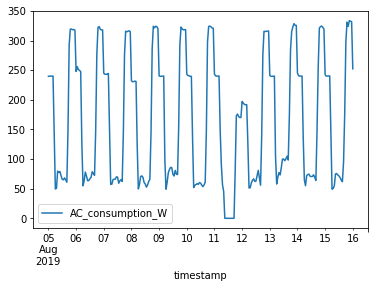

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("./MG_data_hourly_aug.csv")
df.index = pd.to_datetime(df['timestamp'])
#Set
start_date =  "8/5/2019 0:00"
end_date = "8/16/2019 0:00"

#Parameter
dev = "AC_consumption_W"
                 
df_hist = df[start_date:end_date][dev].to_frame()
                      
df_hist.plot()
plt.show()

C:\Users\Nandor-Main\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor-Main\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


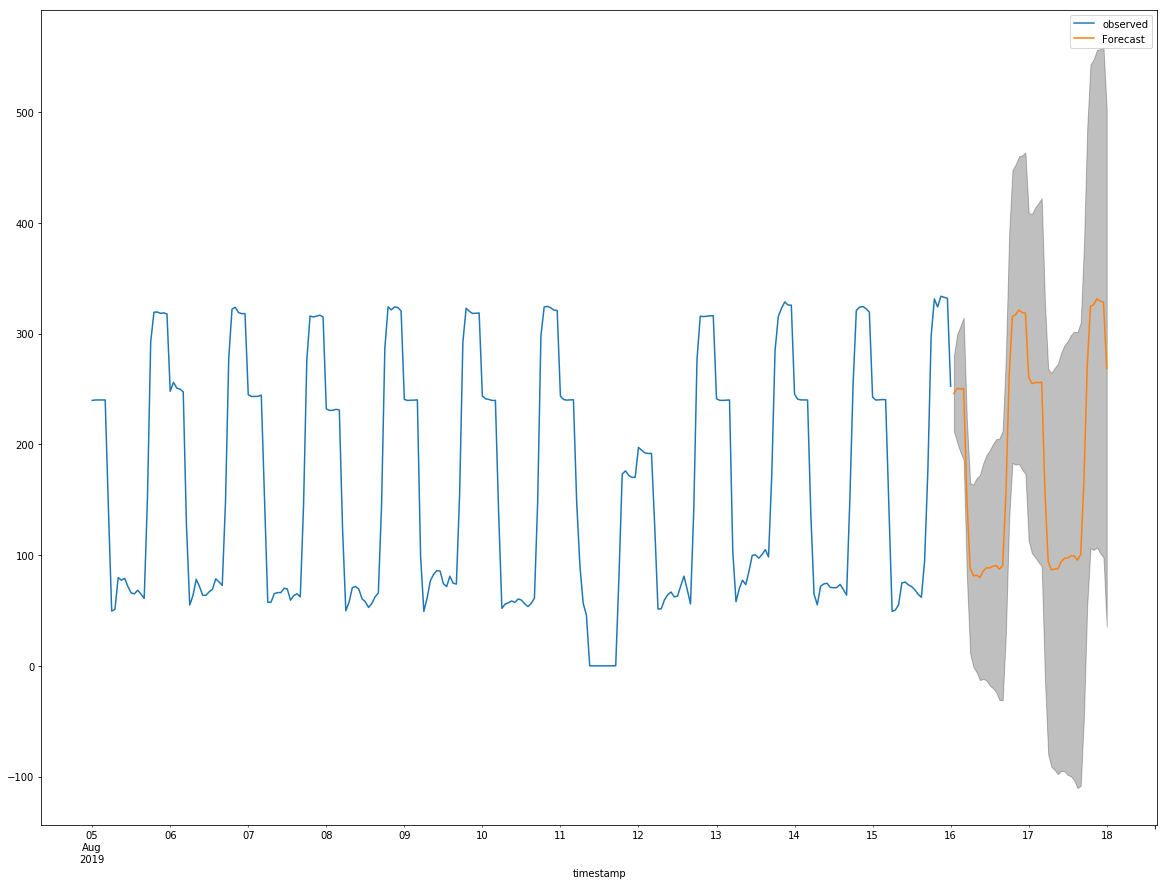

In [14]:
# Get forecast 500 steps ahead in future
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df_hist[dev],
                                order=(1, 1, 2),
                                seasonal_order=(0, 2, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

pred_uc = results.get_forecast(steps=48)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = df_hist[start_date:][dev].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [ ]:
import itertools
import statsmodels.api as sm
import math 
import datetime
import time
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

##Best SARIMA(1, 1, 2)x(0, 2, 2, 24)24 - AIC:5806.556061333564 - range(0, 3)
##Best SARIMA(1, 1, 1)x(1, 1, 1, 24)24 - AIC:6161.695793029599 - range(0.2)
print('Examples of parameter combinations for Seasonal ARIMA...',datetime.datetime.now())
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

best_mod = None
best_aic = None
best_param = None
best_seasonal = None
best_time = None
best_score = 999000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            start = time.time()
            mod = sm.tsa.statespace.SARIMAX(df_hist[dev],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            end = time.time()-start
            score = results.aic+end*10
            print('SARIMA{}x{}24 - AIC:{},Score:{},ProcTime:{}'.format(param, param_seasonal, results.aic,score,end))
            if best_score > score:
                best_mod = results
                best_aic = results.aic
                best_param = param
                best_seasonal = param_seasonal
                best_score = score
                best_time = end
        except Exception as ex:
            print(ex)
            continue
print('Best SARIMA{}x{}24 - AIC:{}, Score:{}, Time:{}'.format(best_param, best_seasonal, best_aic,best_score,best_time))
print('Finished:',datetime.datetime.now())